In [88]:
df = pd.DataFrame(hiddens)
df['name'] = names
df.to_csv('hiddens.csv')

In [272]:
from early_stopping import validate

In [89]:
pd.read_csv('hiddens.csv', index_col=0)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,name
0,0.017652,0.041005,0.049488,0.016279,0.033113,-0.015965,-0.012665,-0.015118,-0.017834,-0.016842,...,0.011305,-0.001120,-0.034178,0.037863,-0.032957,-0.030762,-0.001791,0.025906,-0.035414,R1EZB0.1_1069-1138
1,0.017682,0.041622,0.053020,0.013998,0.033111,-0.017186,-0.014528,-0.012768,-0.017621,-0.012802,...,0.012216,0.000264,-0.034434,0.039452,-0.033339,-0.026146,0.000445,0.029595,-0.034215,S9WB43.1_63-132
2,0.017637,0.033685,0.041647,0.017008,0.034907,-0.021067,-0.010181,-0.013752,-0.013260,-0.014828,...,0.012627,-0.002972,-0.025138,0.052617,-0.033456,-0.026209,-0.003935,0.026459,-0.040626,G3VLX4.1_100-168
3,0.030574,0.038938,0.048841,0.005747,0.024591,-0.025730,-0.011422,-0.021432,-0.014457,-0.021913,...,0.004434,-0.018257,-0.023368,0.054208,-0.035712,-0.012639,-0.015041,0.040283,-0.036845,A0A091RIC4.1_213-277


In [119]:
%rm ../data/tentative_genename_mapping.csv

In [120]:
import re
with open('../data/tentative_genename_mapping.tab', 'rb') as original_file:
    for i, line in enumerate(original_file):
        with open('../data/tentative_genename_mapping.csv', 'a') as new_file:
            line = re.sub(b'\t', b',', line)
            new_file.write(line.decode("utf-8") )

In [180]:
match = pd.read_csv('../data/tentative_genename_mapping.csv')
import numpy as np
beginning, counts = np.unique([to.split('_')[0][:3] for to in match['To']], return_counts=True)
name_count_pairs = sorted(zip(beginning, counts), key=lambda x: x[1], reverse=True)

In [182]:
genes_to_plot = [name for name, count in name_count_pairs[:10]]

In [151]:
hiddens=pd.read_csv('hiddens.csv', index_col=0)

In [284]:
hiddens2=pd.read_csv('hiddens.csv', index_col=0)
hiddens2['name1'] = [name.split('.')[0] for name in hiddens2.name]
match = pd.read_csv('../data/tentative_genename_mapping.csv')
matched = pd.merge(hiddens2, match, left_on='name1', right_on='From')
matched.shape

(7339, 260)

In [177]:
matched = pd.merge(hiddens, match, left_on='name1', right_on='From')

In [183]:
matched['genID'] = [to[:3] for to in matched['To']]

In [212]:
# hiddens_to_plot = matched.loc[[gene in genes_to_plot for gene in matched['genID']], :].drop(
#     ['name','name1', 'From', 'To'], 1)
hiddens_to_plot = matched.drop(['name','name1', 'From', 'To'], 1)

In [248]:
from imp import reload
import tsne
reload(tsne)
fig = tsne.plot('2d', hiddens_to_plot['genID'], hiddens_to_plot.drop('genID', 1).values, perplexity=10)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7339
[t-SNE] Computed conditional probabilities for sample 2000 / 7339
[t-SNE] Computed conditional probabilities for sample 3000 / 7339
[t-SNE] Computed conditional probabilities for sample 4000 / 7339
[t-SNE] Computed conditional probabilities for sample 5000 / 7339
[t-SNE] Computed conditional probabilities for sample 6000 / 7339
[t-SNE] Computed conditional probabilities for sample 7000 / 7339
[t-SNE] Computed conditional probabilities for sample 7339 / 7339
[t-SNE] Mean sigma: 1.751019
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.349417
[t-SNE] Error after 350 iterations: 1.349417


In [254]:
reload(tsne)
tsne.plot('2d', hiddens_to_plot['genID'], hiddens_to_plot.drop('genID', 1).values, perplexity=100)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7339
[t-SNE] Computed conditional probabilities for sample 2000 / 7339
[t-SNE] Computed conditional probabilities for sample 3000 / 7339
[t-SNE] Computed conditional probabilities for sample 4000 / 7339
[t-SNE] Computed conditional probabilities for sample 5000 / 7339
[t-SNE] Computed conditional probabilities for sample 6000 / 7339
[t-SNE] Computed conditional probabilities for sample 7000 / 7339
[t-SNE] Computed conditional probabilities for sample 7339 / 7339
[t-SNE] Mean sigma: 1.751019
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.352078
[t-SNE] Error after 300 iterations: 1.352078


In [294]:
reload(tsne)
tsne.plot('Representation for filtered RRMs', hiddens_to_plot['genID'], hiddens_to_plot.drop('genID', 1).values, perplexity=100)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7339
[t-SNE] Computed conditional probabilities for sample 2000 / 7339
[t-SNE] Computed conditional probabilities for sample 3000 / 7339
[t-SNE] Computed conditional probabilities for sample 4000 / 7339
[t-SNE] Computed conditional probabilities for sample 5000 / 7339
[t-SNE] Computed conditional probabilities for sample 6000 / 7339
[t-SNE] Computed conditional probabilities for sample 7000 / 7339
[t-SNE] Computed conditional probabilities for sample 7339 / 7339
[t-SNE] Mean sigma: 1.751019
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.349715
[t-SNE] Error after 325 iterations: 1.349715


In [280]:
hiddens1 = pd.read_csv('../../../../Downloads/hiddens.csv', index_col=0)

In [543]:
def txt_to_csv(raw_txt_path, sep=None):
    """parses txt file or fasta file into csv
    info_positions: list of positions populated beyond a threshold"""

    print('Parsing sequence input file...')

    dic = dict()
    name = None
    seq = None
    with open(raw_txt_path) as RRM:
        for i, line in enumerate(RRM):
            if '#' in line:
                pass
            else:
                name, seq = line.split(sep)
                name = name.replace('/', '_') # to distinguish from directory
                name = name.replace('>', '')
                seq = seq.replace('\n', '')
                # separator down the line
                dic.update([(name, seq)])

    df = pd.DataFrame(list(map(lambda x: list(x.upper()), list(dic.values()))), index=dic.keys())
    return df

def informative_positions(df, processed_RRM_path, filter_threshold=None, top_n=82, placeholder='-'):
    """rid of excessive placeholders, 
    keeping top_n most populated positions
    or filterout positions populated less than a threshold"""
    if top_n:
        print('Extracting top %d most populated positions...'%top_n)
    elif filter_threshold:
        print('Filtering out positions  more than %.2f%% populated...'%(filter_threshold*100))
    else:
        raise ValueError('either filter_threshold or top_n has to be a number.')
        
    populate_rate = df.applymap(lambda x: x != placeholder).sum(axis=0)/df.shape[0]
    if top_n:
        positions_to_keep = [i for i, rate in enumerate(populate_rate) \
                             if rate in sorted(populate_rate, reverse=True)[:top_n]]
    else:
        positions_to_keep = [i for i, rate in enumerate(populate_rate) if rate > filter_threshold]
    
    print('keeping %d positions in sequence'%(len(positions_to_keep)+2))
    informative_values = list(map(lambda x: ['<start>'] + x.tolist() + ['<end>'], 
                                  df[positions_to_keep].values))
    df1 = pd.DataFrame(informative_values, index=df.index)
#     df1.to_csv(processed_RRM_path)
    print('Done! Filtered df output as %s'%processed_RRM_path)
    return populate_rate[positions_to_keep], positions_to_keep, df1

def preprocess(preprocessed, RRM_path, output_path, sep=' ', vocab=None):
    assert os.path.isfile(RRM_path), 'input RRM path: %s not found!' %(RRM_path)
    df = pd.read_csv(RRM_path, index_col=0)
    if not preprocessed:
        df = txt_to_csv(RRM_path)
        df= informative_positions(df, processed_RRM_path=output_path)
    if not vocab:
        vocab = build_vocab(df)
        return vocab, df
    else:
        return df
# df = preprocess(True, '../data/combined_processed.csv', '../data/combined_processed.csv' , vocab=vocab)

def _get_correct_dim(height):
    return np.floor((height-1)/2 + 1)


width = int(_get_correct_dim(_get_correct_dim(original_size - 4 - 2 - 2)))
width  = width - 4
threshold =.5/100
pop_rate, positions, RRM_df_filtered = informative_positions(RRM_df, None, filter_threshold=threshold, top_n=None)

Filtering out positions  more than 0.50% populated...
keeping 135 positions in sequence
Done! Filtered df output as None


In [501]:
original_size = RRM_df_filtered.shape[1]
def _get_correct_dim(height):
    return np.floor((height-1)/2 + 1)


width = int(_get_correct_dim(_get_correct_dim(original_size - 4 - 2 - 2)))
width  = width - 4

In [378]:
def train_test_split(df):
    np.random.seed(0)  # COMBINED DATA
    msk = np.random.rand(df.shape[0]) < .7
    df['index'] = df.index
    df[msk].loc[:,'index'].to_csv('../data/train_index.csv', index=False, header=False)
    test = df[~msk]
    test_msk = np.random.rand(test.shape[0]) < 1.0/3
    test[test_msk].loc[:,'index'].to_csv('../data/test_index.csv', index=False, header=False)
    test[~test_msk].loc[:,'index'].to_csv('../data/val_index.csv', index=False, header=False)
    df = df.drop('index', 1)
    return df
df = train_test_split(df)

In [424]:
RRM_df = txt_to_csv('../data/comineddata_nolinegaps_space_delim.fasta')

Parsing sequence input file...


In [584]:
len([ind for ind in RRM_df.index if '||' in ind])

719

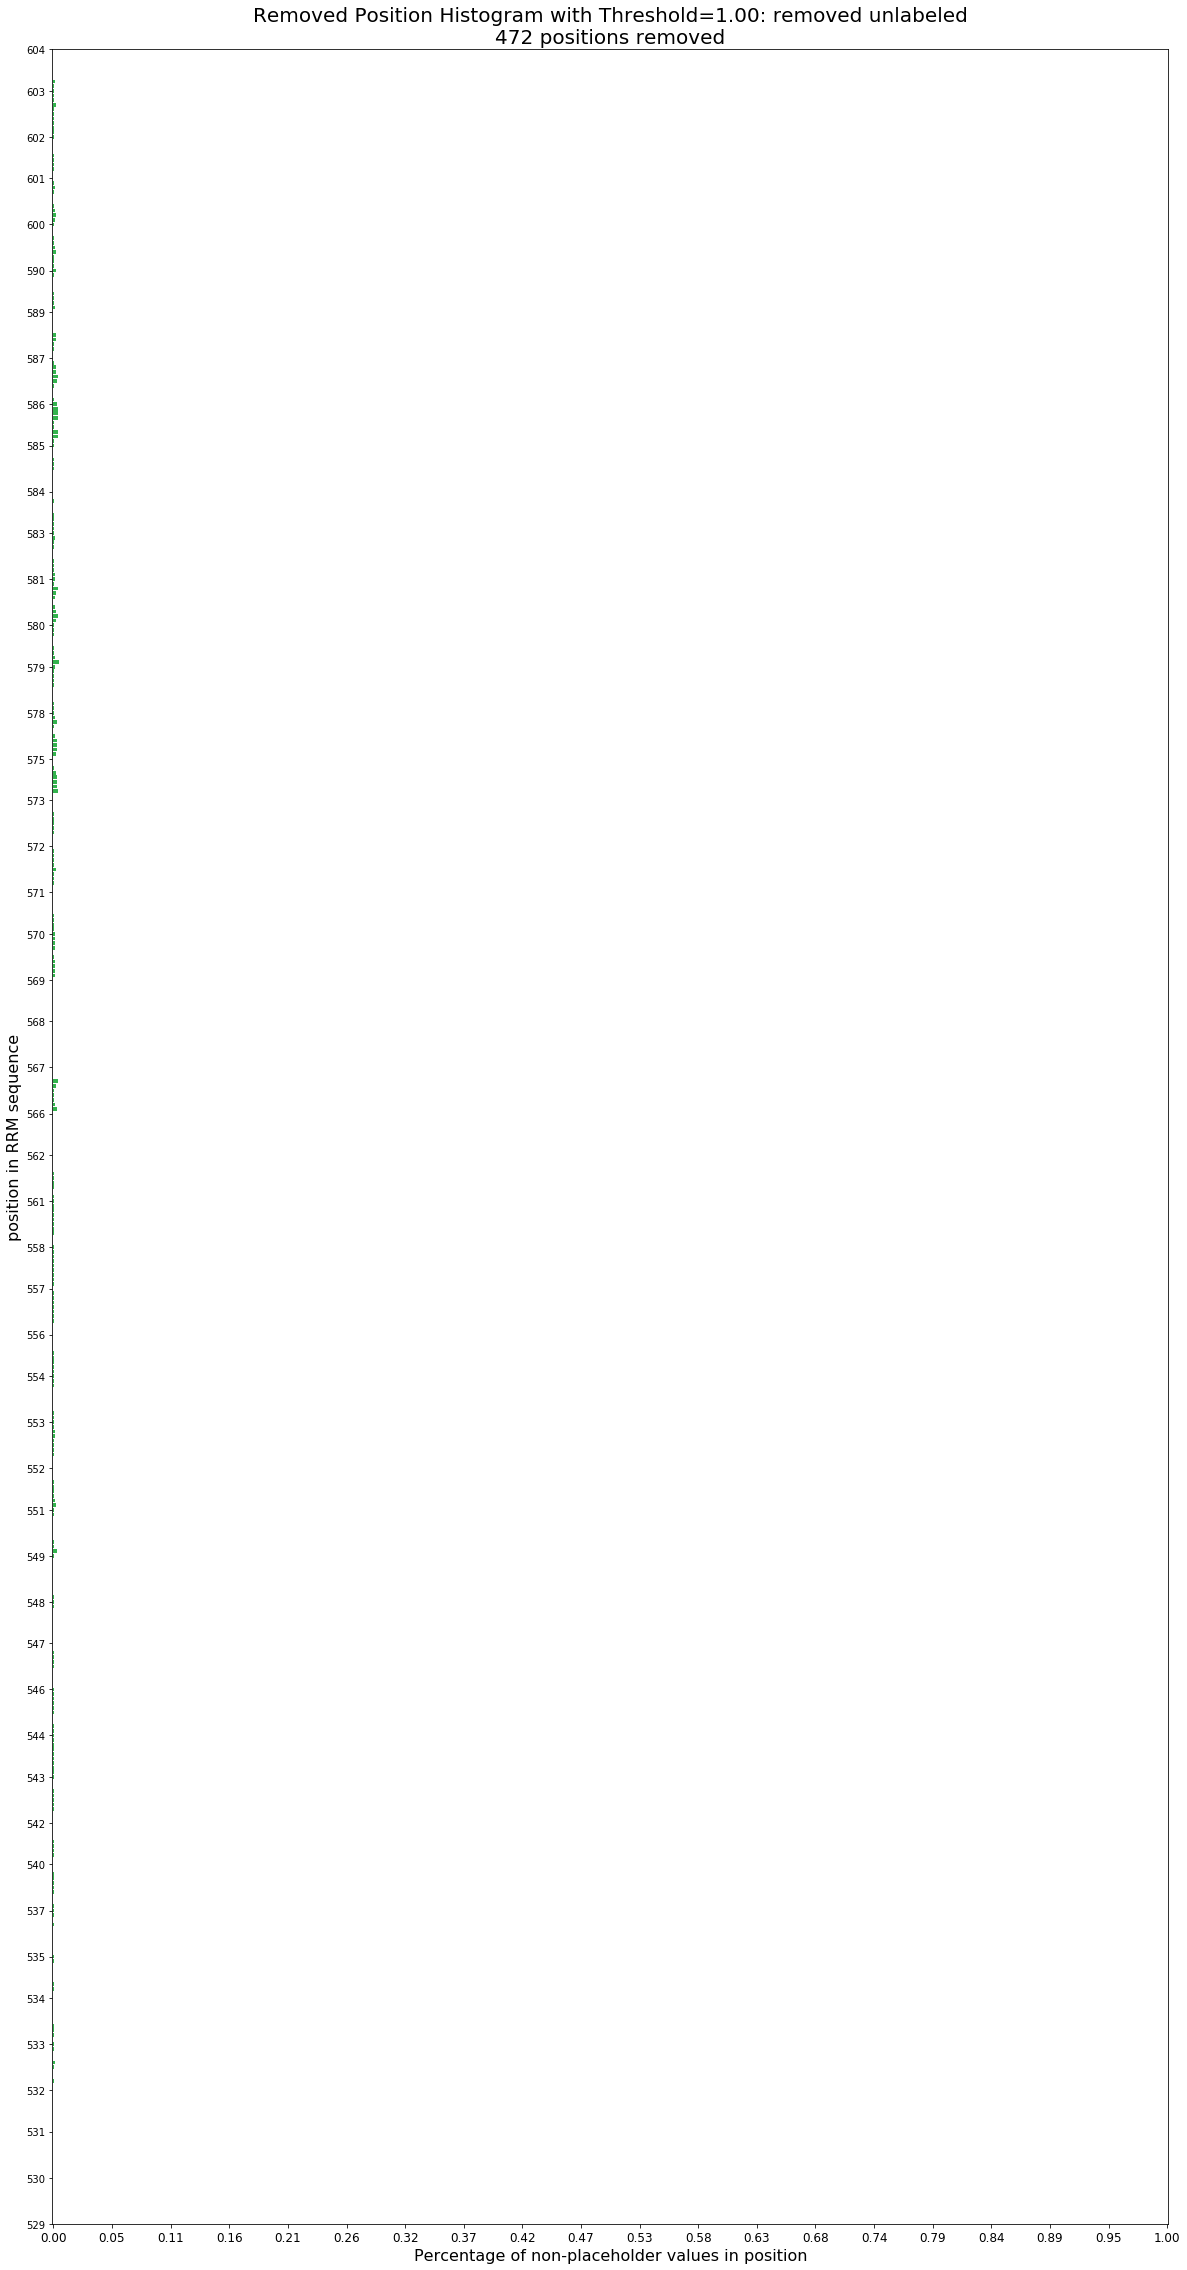

In [606]:
plot_labele_population(RRM_df, threshold, [pos for pos in np.arange(RRM_df.shape[1]) if pos not in positions], 
                      dataset='removed unlabeled')

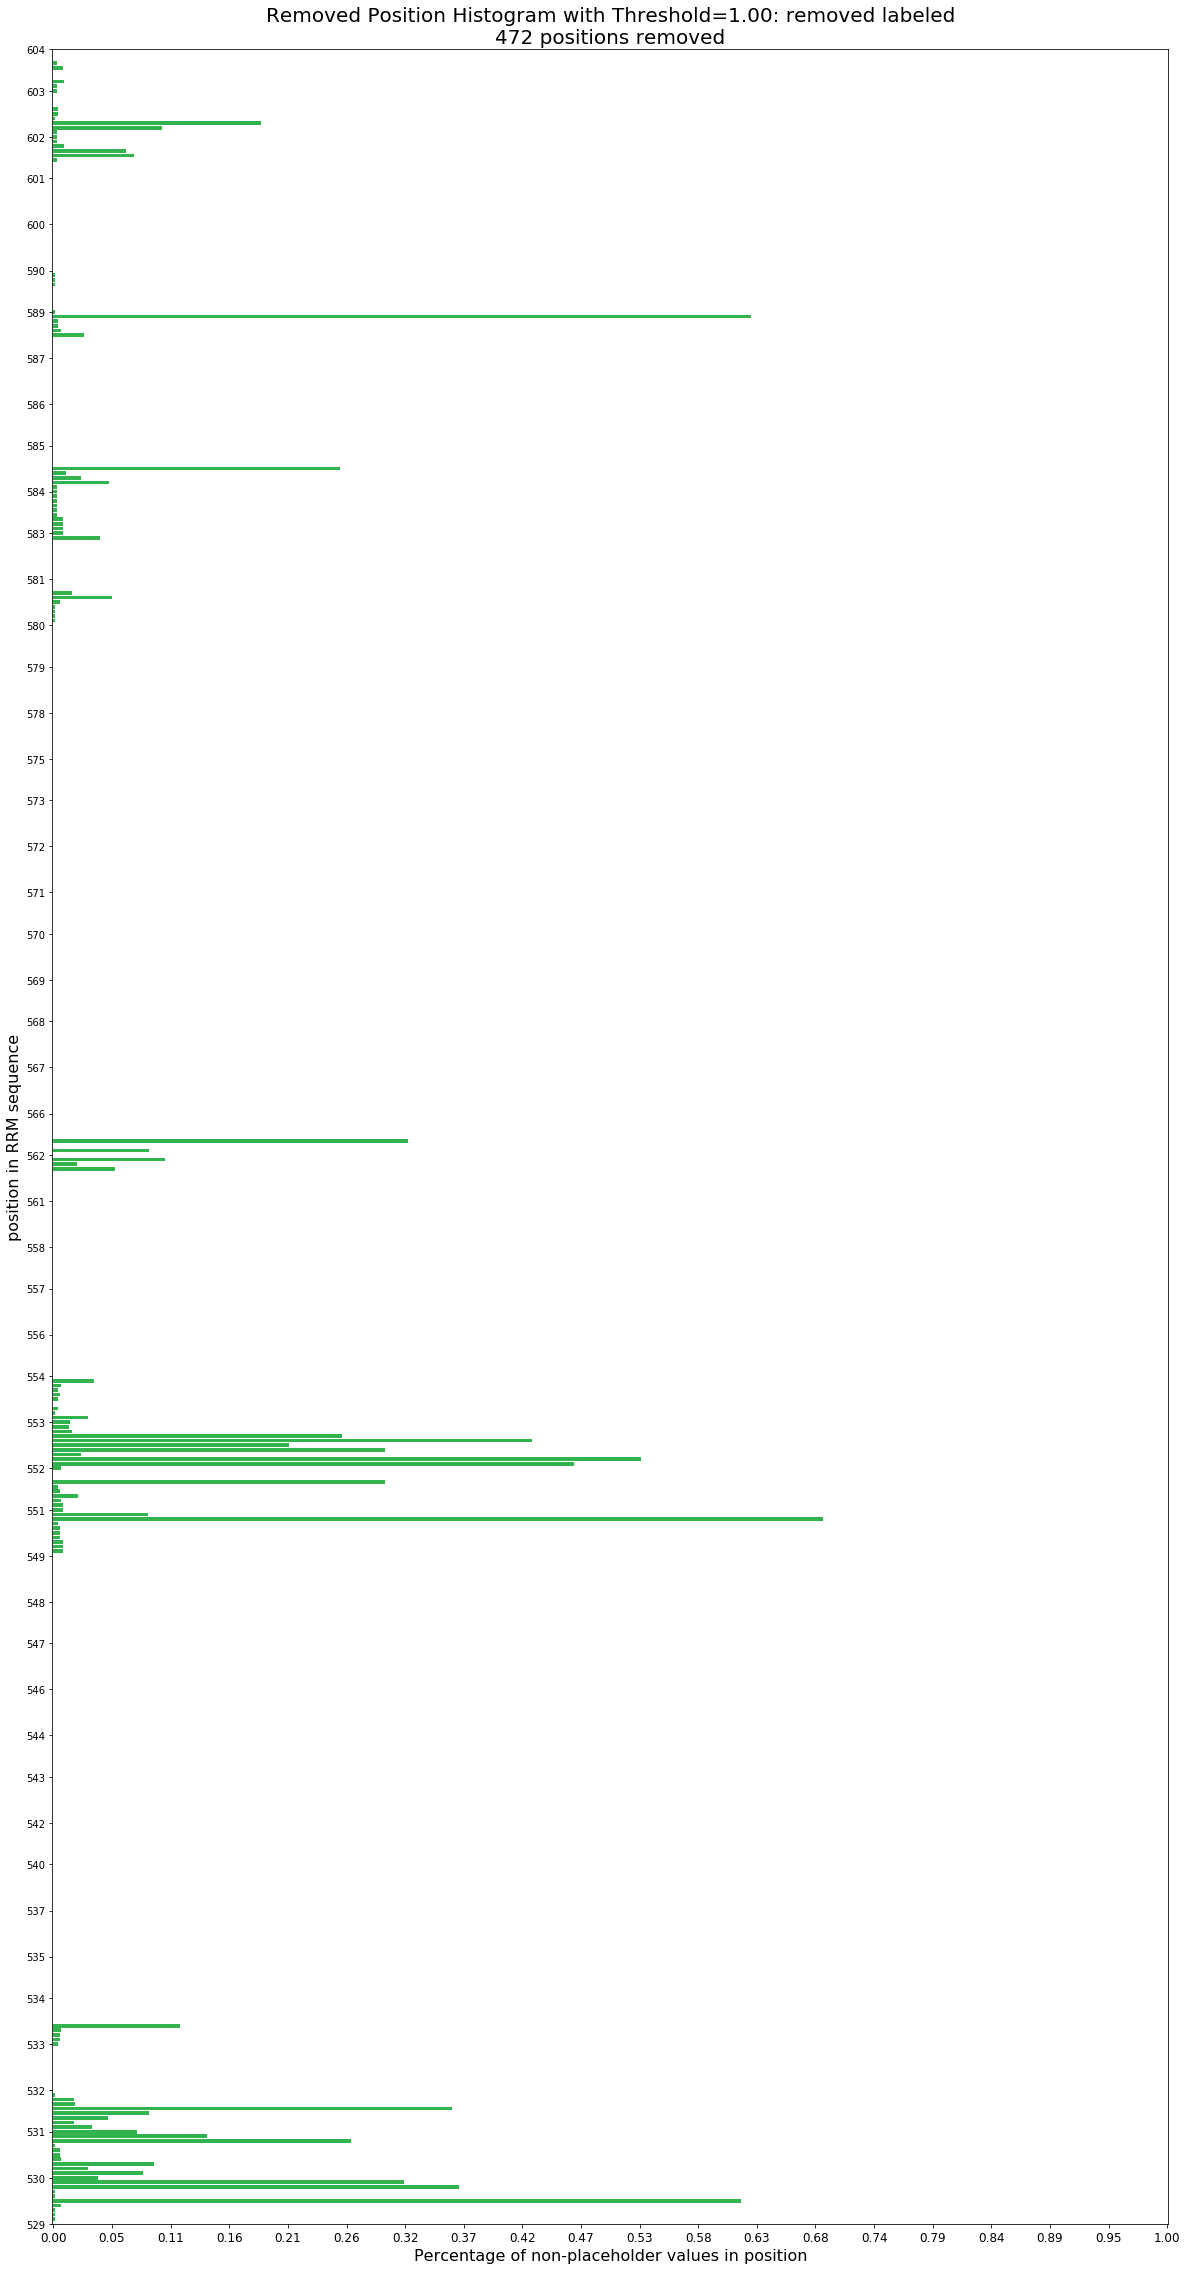

In [605]:
plot_labele_population(RRM_df, threshold, [pos for pos in np.arange(RRM_df.shape[1]) if pos not in positions], 
                      dataset='removed labeled')

In [594]:
'labaled' in 'whole dataset'.split(' ')

False

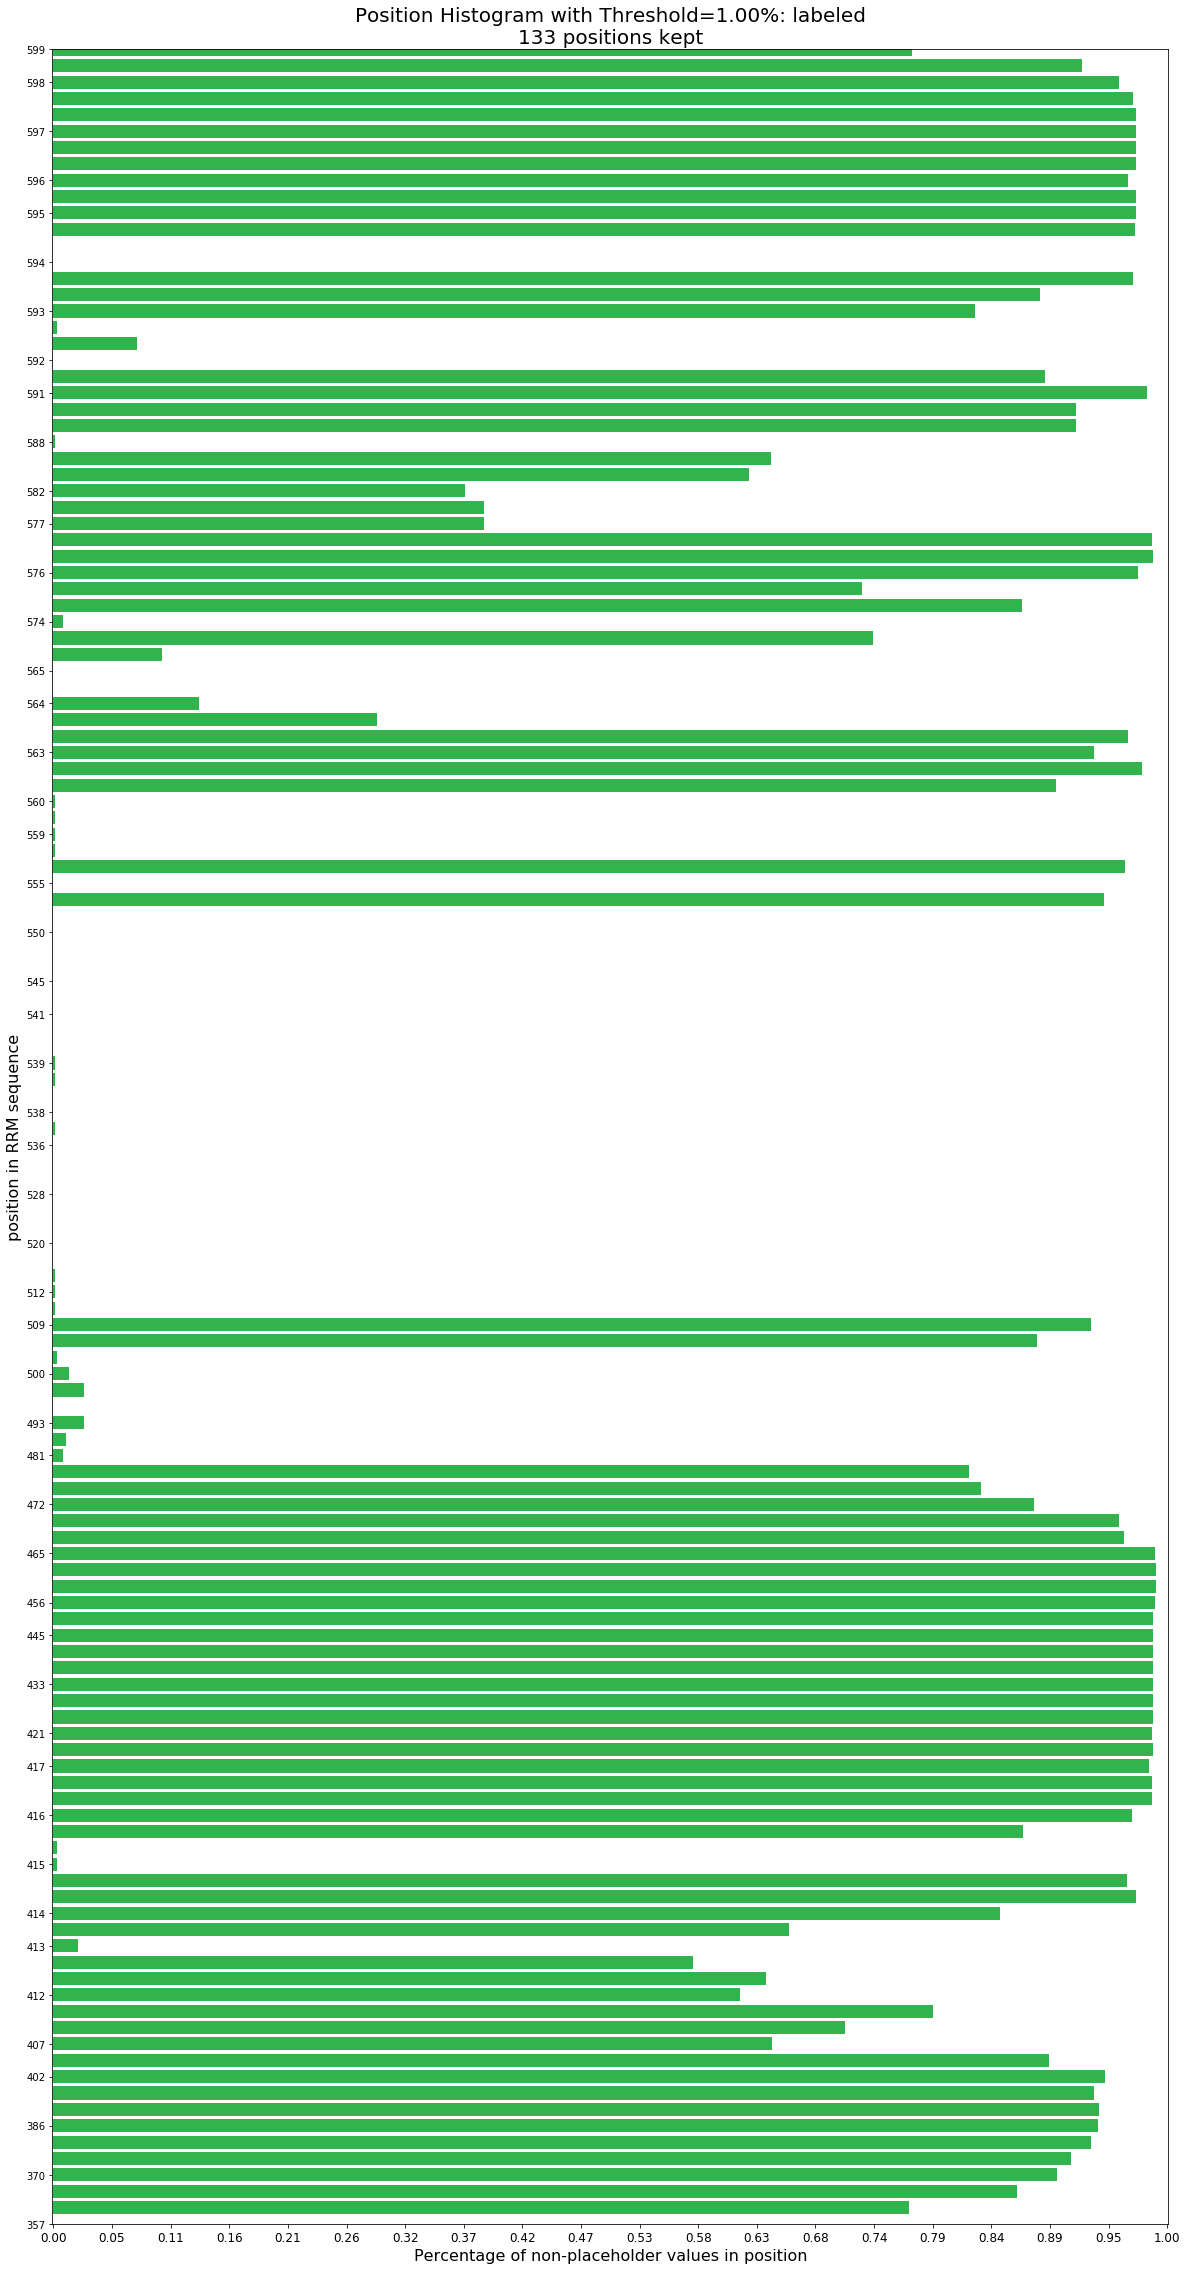

In [599]:
def plot_labele_population(df, threshold, positions, dataset):
    if 'labeled' in dataset.split(' '):
        ind = [ind for ind in df.index if '||' in ind]
    else:
        ind = [ind for ind in df.index if '||' not in ind]
    def get_population_rate(df, placeholder='-'):
        populate_num = df.applymap(lambda x: x != placeholder).sum(axis=0)/df.shape[0]
        return populate_num
    
    labeled_pop_num = get_population_rate(df.loc[ind, :])[positions]        
    plot_num_population(threshold, labeled_pop_num, positions, dataset, color=[.2, .7, .3])

plot_labele_population(RRM_df, threshold, positions, dataset='labeled')

In [ ]:
plot_labele_population(RRM_df, threshold, positions)

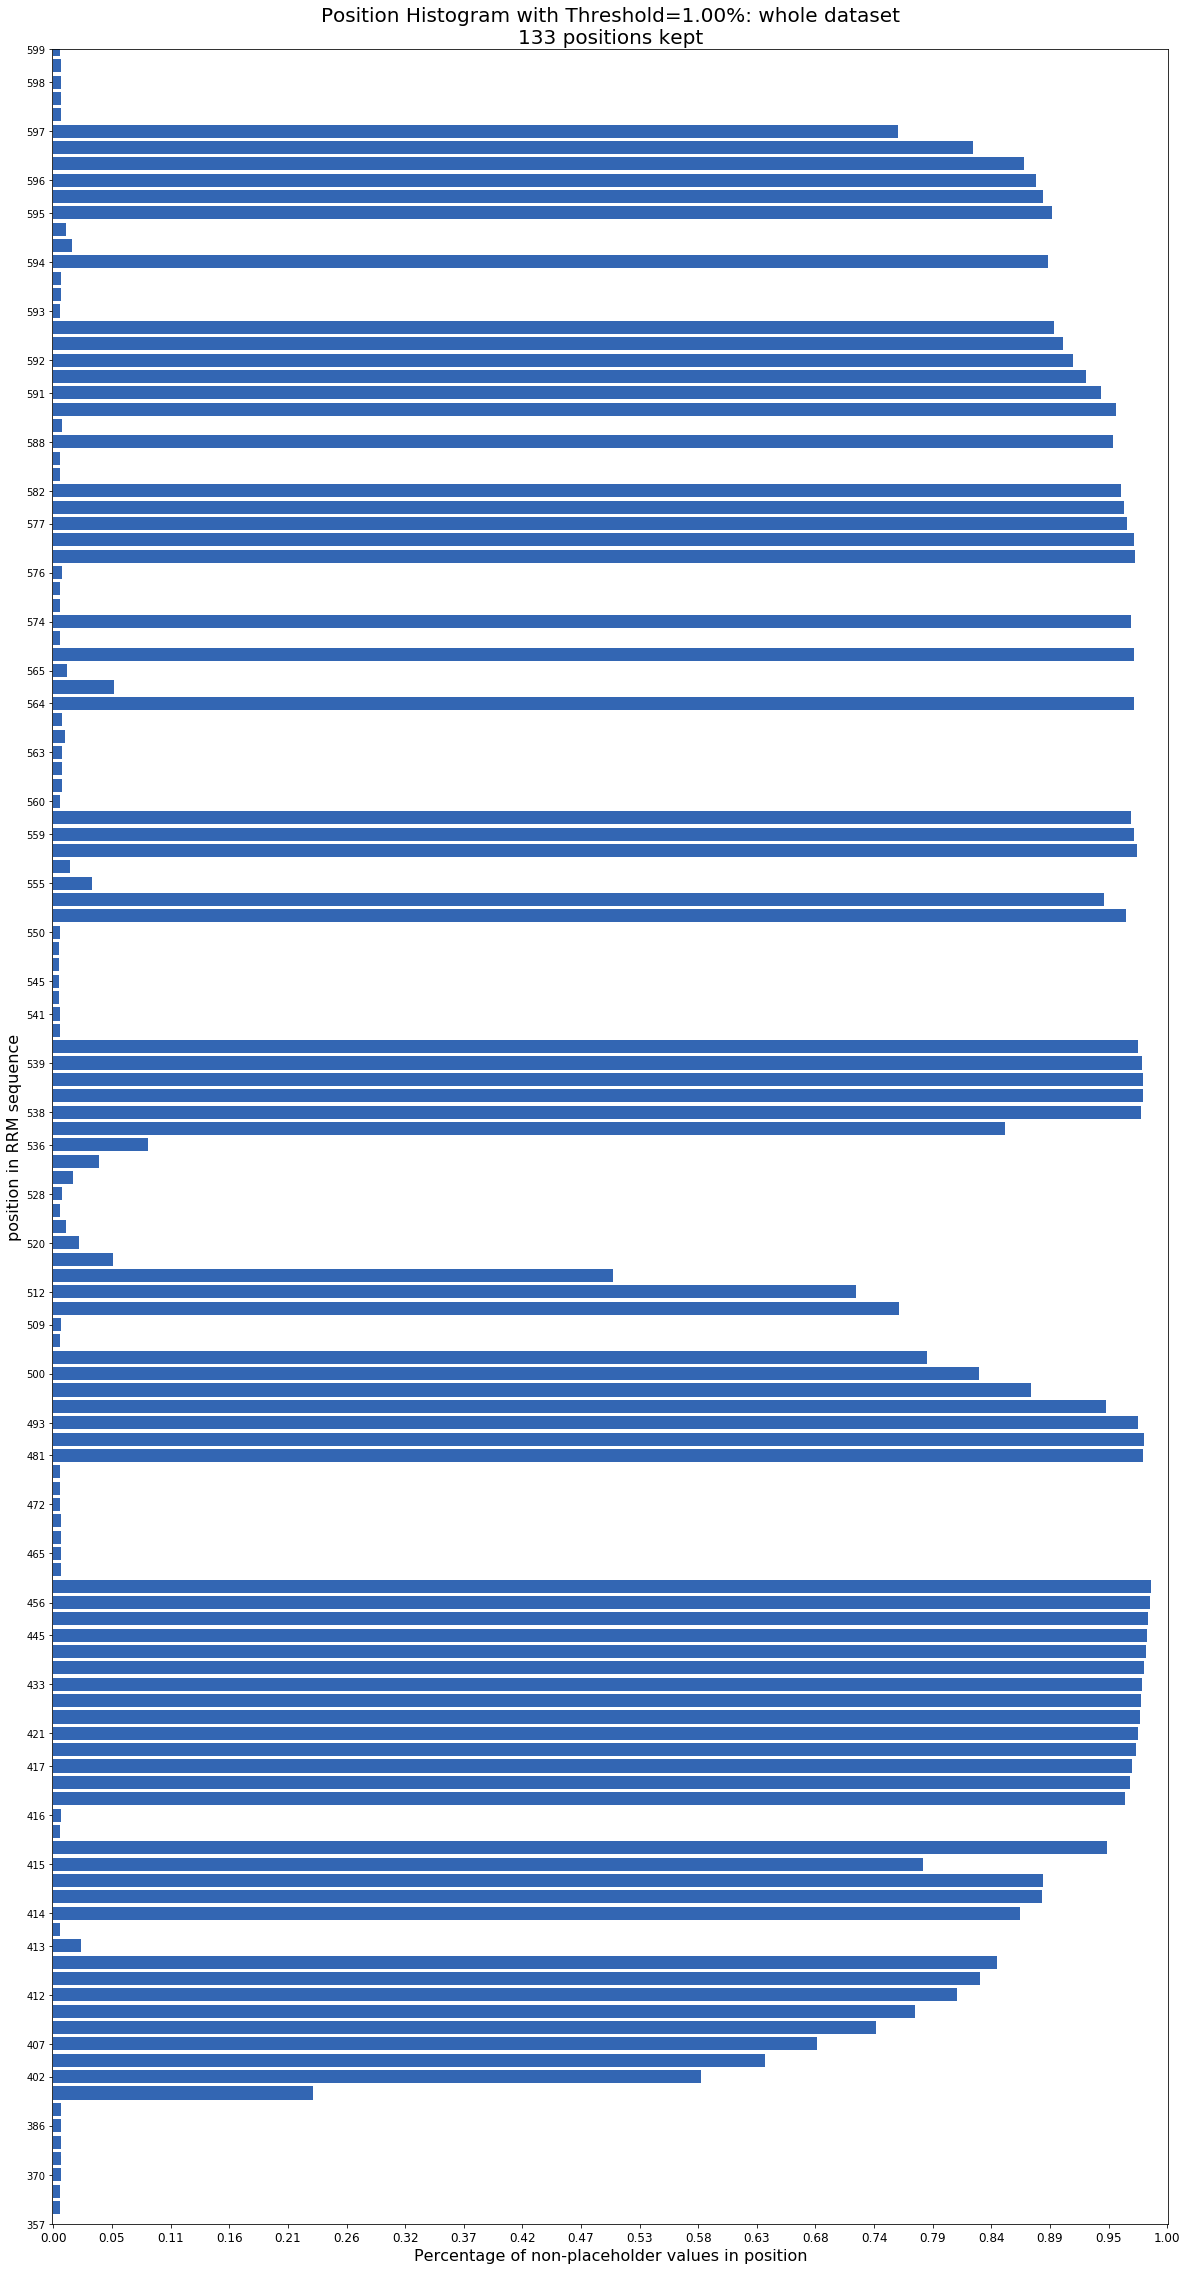

In [598]:
%matplotlib inline
import re
threshold = .01
def plot_num_population(threshold, pop_num, positions, dataset='whole dataset', color=[.2, .4, .7]):
    title = 'Position Histogram with Threshold=%.2f%%: %s\n%d positions kept'%(
        threshold*100, dataset, len(positions))
    if 'removed' in dataset:
        title = 'Removed Position Histogram with Threshold=%.2f: %s\n%d positions removed'%(
            threshold*100, dataset, len(positions))
    fig, ax = plt.subplots(figsize=(20, 40))
    y_pos = [np.floor(num) for num in np.linspace(0, len(pop_num), 50)]
    ax.barh(np.arange(0, len(pop_num)), pop_num, align='center', color=color)
    ax.invert_yaxis()
    ax.set_yticks(y_pos)
    ax.set_yticklabels(reversed(positions))
    ax.set_ylim([len(pop_num) + 1e-3, -1e-3])
    ax.set_ylabel('position in RRM sequence', fontsize=16)
    ax.set_xlabel('Percentage of non-placeholder values in position', fontsize=16)
    ax.set_xlim([-1e-3, 1+1e-3]) 
    x_pos = np.linspace(0, 1, 20)
    ax.set_xticks(x_pos)
    x_pos = ["%.2f"%num for num in x_pos]
    ax.set_xticklabels(x_pos, fontsize=12)
    plt.title(title, fontsize=20)
    plt.show()
    fig.savefig('%s.png'%re.sub(' ', '_', title))
plot_num_population(threshold, pop_rate, positions)  

In [428]:
RRM_df.shape

(100651, 605)

In [379]:
train_index = pd.read_csv('../data/train_index.csv',header=None).iloc[:,0]
val_index = pd.read_csv('../data/val_index.csv',header=None).iloc[:,0]
df.loc[train_index, :]
torch.cuda.

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
T080824||RNCMPT00434_RRM__0,<start>,V,F,L,G,G,V,-,-,-,...,-,-,-,-,-,-,-,-,-,<end>
T117424||RNCMPT00259_RRM__1,<start>,L,Y,I,K,H,L,-,-,-,...,-,I,-,-,G,S,P,I,H,<end>
T080738||RNCMPT00001_RRM__0,<start>,I,F,I,G,K,L,-,-,-,...,E,I,-,R,N,G,R,L,L,<end>
T105643||RNCMPT00482_RRM__0,<start>,V,Y,L,N,N,L,-,-,-,...,-,P,-,-,G,K,P,I,E,<end>
T002501||RNCMPT00309_RRM__0,<start>,V,Y,V,G,G,I,-,-,-,...,-,-,V,L,G,R,T,I,R,<end>
T080661||RNCMPT00004_RRM__0,<start>,L,F,I,G,Q,I,-,-,-,...,K,T,L,P,G,M,P,I,Q,<end>
T080792||RNCMPT00820_RRM__0,<start>,V,Y,V,G,S,I,-,-,-,...,V,M,L,G,G,R,N,I,K,<end>
T016928||RNCMPT00113_RRM__0,<start>,L,F,I,G,N,L,-,-,-,...,-,-,L,H,G,V,N,I,N,<end>
T016928||RNCMPT00052_RRM__0,<start>,L,F,I,G,N,L,-,-,-,...,-,-,L,H,G,V,N,I,N,<end>
T112023||RNCMPT00217_RRM__0,<start>,V,W,V,G,N,L,-,-,-,...,-,-,S,L,G,G,A,R,-,<end>
